# Neural Networks

In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see few examples of practical applications regarding regression and classification issues. 

**Disclaimer**: this lecture just scratches the surface of the machine learning topic which has seen a huge development in the latest years leading to thousands of applications in many different fields.

## Neural network Definition
Artificial Neural Networks (ANN or simply NN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. 

The basic unit of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron consists of weights ($w_i$) and real numbers ($x_i$). All inputs injected into a neuron are individually weighted, added together (sometimes it is added also a bias $w_0$) and passed into the activation function which produce the neuron output. There are many different types of activation function but one of the simplest is the *step function* which returns just 0 or 1 according to the input value (another is the *sigmoid* which can be thought of as the continuous version of the step function). 

![Sigmoid function.](sigmoid.png)

Other commonly used activation functions are Rectified Linear Unit (ReLU), Tan Hyperbolic (tanh) and Identity function.

For an deeper discussion of activation functions see [this article](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

## Training of a neuron

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.

This is exactly the idea behind neurons.
Similarly, inputs from a *training* set are presented to the neuron one after the other together with the correct output and the neuron weights are modified accordingly.

When an entire pass through all of the input training vectors is completed the neuron has learnt ! 

At this time, if an input vector $\vec{P}$ (already in the training set) is given to the neuron, it will output the correct value. If $\vec{P}$ is not in the training set, the network will respond with an output similar to other training vectors close to $\vec{P}$.

This kind of training is called *supervised*. It’s supervised because we have a set of training data with known targets and, during training, we want our model to learn to predict the grade from the other variables. 

Unfortunately using just a neuron is not too useful since it is not possible to solve
the interesting problems we would like to face with just that simple architecture. The next step is then to put together more neurons in *layers*.

### Multi-layered Neural networks

![A multi-layered neural network.](multilayer.jpeg)

Each input from the *input layer* is fed up to each node in the next hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.

### Training a Multilayered Neural Network

The training of a multilayered NN follows these steps:

* present a training sample to the neural network (initialized with random weights);
* compute the network output obtained by calculating activations of each layer;
* calculate the error (loss) as the difference between the NN predicted output and the actual output;
* having calculated the error, readjust the weights of the network such that the error (difference) decreases;
* continue the process for all samples several times (epochs) until the weights are not changing too much (a.k.a. the process converged).

<img src="training_nn.png">

The NN error is computed by the *loss function*. Different loss functions will give different errors for the same prediction, and thus have a considerable effect on the performance of the model. Two are the main possible choices

* Mean Absolute Error (MAE): the average of the absolute value of the differences between the predictions and true values;
* Root Mean Squared Error (MSE): the square root of the average of the squared differences between the predictions and true values.

The mean absolute error is easily interpretable, as it represents how far off we are on average from the correct value. The root mean squared error penalizes larger errors more heavily and is commonly used in regression tasks. Either metric may be appropriate depending on the situation and you can use both for comparison. [Here](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) is a discussion of the merits of these metrics.

The error or loss is a function of the internal parameters of the model i.e weights and bias. For accurate predictions, one needs to minimize the calculated error.
In a neural network, this is done using *back propagation* (see [this article](https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd)). The current error is typically propagated backwards to a previous layer, where it is used to modify the weights and bias in such a way that the error is minimized.

<img src="loss_function.png">

The weights are modified using a function called Optimization Function (we will use *Adam* as optimizator in the following but there are more).

### Neural Network Design

There is no rule to guide developer into the design of a neural network in terms of number of layers and neuron per layer. The most common strategy is a trail and error one where you finally pick up the solution giving the best accuracy. In general a larger number of nodes is better to catch highly structured data with a lot of feature although it may require larger training sample to work correctly.

A common mistake to avoid is to *overtrain* a NN. Overtraining is what happens when the NN learns too well the training sample but its performance degrade substantially in an independent testing sample. 

So usually it is required to split the available sample in two parts training and testing (e.g. 80% and 20%) and to use the former to perform the training and the latter to cross-check the performance. **Usually performance are *measured* with the mean square error computed between the truth of the sample and the NN predictions.**

Anyway as a rule of thumb a NN with just one hidden layer with a number of neurons averaging the inputs and outputs is sufficient in most cases. In the following we will use more complex networks just for illustration, no strong attempt in optimizing the layout has been done though.

## Practical Examples

### Function approximation 

As a first practical example let's try to design an ANN which is capable of learning the functional form underlying a set of data.

Let's generate a sample with $x$ (input), $f(x)$ (truth) pairs where $f(x) = x^3 +2$ and let's start to code the NN structure. 

We start by importing the necessary modules.
Then we generate the training sample (i.e. the $x$, $f(x)$ pairs) and apply a simple transformation on the sample in order to have all the inputs and outputs in the $[0, 1]$ range. This is usually done to provide the NN with *normalized* data, infact the NN can be fooled by large or very small numbers giving unstable results.

In [3]:
from finnn import FinNN
from numpy import arange, array

# define the dataset
x = array([i for i in arange(-2, 2, 0.005)])

y = array([i**3+2 for i in x])
print("Distribution of original data ", x.min(), x.max(), y.min(), y.max())

trainer = FinNN()
trainer.setData(x, y)

trainer.normalize()

# here you should see that x and y are between 0 and 1
print("The same data after the normalization ", trainer.x.min(), 
      trainer.x.max(), trainer.y.min(), trainer.y.max())

Distribution of original data  -2.0 1.9949999999999148 -6.0 9.940149874998983
The same data after the normalization  0.0 1.0 0.0 1.0


Next we can define the structure of the neural network. There is no predefined rule to decide the number of layers and nodes you need to go by trial and error. Here the problem is quite simple so there is no need to use a complecated NN. 

In the end I have decided to use two layers with 10 nodes each and a *sigmoidal* activation function. The input_dim parameter has to be set to 1 since we have just one single input, the $x$ value. 

In [4]:
# design the neural network model
trainer.addInputLayer(1, 15, 'tanh')
trainer.addHiddenLayer(5, 'tanh')
trainer.addOutputLayer(1)

# define the loss function (mean squared error) and optimization algorithm (Adam)
trainer.compileModel('mse', 'adam')

# fit the model on the training dataset
# using 500 epochs, a batch_size of 10
trainer.fit(800, 100, verbose=1)

# make predictions for the input data
trainer.fullPrediction()

# invert the previous transformation to get back the real data and not the normalized one
trainer.reverseNormalization()

Epoch 1/800
799/799 [==============================] - 1s 2ms/step - loss: 0.1933
Epoch 2/800
799/799 [==============================] - 0s 69us/step - loss: 0.0703
Epoch 3/800
799/799 [==============================] - 0s 50us/step - loss: 0.0191
Epoch 4/800
799/799 [==============================] - 0s 39us/step - loss: 0.0124
Epoch 5/800
799/799 [==============================] - 0s 54us/step - loss: 0.0144
Epoch 6/800
799/799 [==============================] - 0s 54us/step - loss: 0.0126
Epoch 7/800
799/799 [==============================] - 0s 55us/step - loss: 0.0102
Epoch 8/800
799/799 [==============================] - 0s 54us/step - loss: 0.0096
Epoch 9/800
799/799 [==============================] - 0s 53us/step - loss: 0.0095
Epoch 10/800
799/799 [==============================] - 0s 56us/step - loss: 0.0091
Epoch 11/800
799/799 [==============================] - 0s 50us/step - loss: 0.0089
Epoch 12/800
799/799 [==============================] - 0s 53us/step - loss: 0.0087
Ep

799/799 [==============================] - 0s 41us/step - loss: 0.0026
Epoch 195/800
799/799 [==============================] - 0s 41us/step - loss: 0.0025
Epoch 196/800
799/799 [==============================] - 0s 41us/step - loss: 0.0025
Epoch 197/800
799/799 [==============================] - 0s 39us/step - loss: 0.0025
Epoch 198/800
799/799 [==============================] - 0s 40us/step - loss: 0.0025
Epoch 199/800
799/799 [==============================] - 0s 41us/step - loss: 0.0024
Epoch 200/800
799/799 [==============================] - 0s 40us/step - loss: 0.0024
Epoch 201/800
799/799 [==============================] - 0s 51us/step - loss: 0.0024
Epoch 202/800
799/799 [==============================] - 0s 44us/step - loss: 0.0024
Epoch 203/800
799/799 [==============================] - 0s 43us/step - loss: 0.0024
Epoch 204/800
799/799 [==============================] - 0s 47us/step - loss: 0.0023
Epoch 205/800
799/799 [==============================] - 0s 41us/step - loss: 0

799/799 [==============================] - 0s 44us/step - loss: 6.4690e-04
Epoch 383/800
799/799 [==============================] - 0s 45us/step - loss: 6.3506e-04
Epoch 384/800
799/799 [==============================] - 0s 45us/step - loss: 6.4377e-04
Epoch 385/800
799/799 [==============================] - 0s 37us/step - loss: 6.2693e-04
Epoch 386/800
799/799 [==============================] - 0s 41us/step - loss: 6.2900e-04
Epoch 387/800
799/799 [==============================] - 0s 40us/step - loss: 6.3101e-04
Epoch 388/800
799/799 [==============================] - 0s 41us/step - loss: 6.3466e-04
Epoch 389/800
799/799 [==============================] - 0s 41us/step - loss: 6.1244e-04
Epoch 390/800
799/799 [==============================] - 0s 43us/step - loss: 6.0733e-04
Epoch 391/800
799/799 [==============================] - 0s 43us/step - loss: 6.2462e-04
Epoch 392/800
799/799 [==============================] - 0s 41us/step - loss: 6.2210e-04
Epoch 393/800
799/799 [============

799/799 [==============================] - 0s 43us/step - loss: 2.3908e-04
Epoch 567/800
799/799 [==============================] - 0s 42us/step - loss: 2.4168e-04
Epoch 568/800
799/799 [==============================] - 0s 63us/step - loss: 2.2840e-04
Epoch 569/800
799/799 [==============================] - 0s 45us/step - loss: 2.3613e-04
Epoch 570/800
799/799 [==============================] - 0s 51us/step - loss: 2.4956e-04
Epoch 571/800
799/799 [==============================] - 0s 46us/step - loss: 2.1858e-04
Epoch 572/800
799/799 [==============================] - 0s 42us/step - loss: 2.1315e-04
Epoch 573/800
799/799 [==============================] - 0s 44us/step - loss: 2.1252e-04
Epoch 574/800
799/799 [==============================] - 0s 45us/step - loss: 2.1875e-04
Epoch 575/800
799/799 [==============================] - 0s 44us/step - loss: 2.2724e-04
Epoch 576/800
799/799 [==============================] - 0s 40us/step - loss: 2.4108e-04
Epoch 577/800
799/799 [============

799/799 [==============================] - 0s 50us/step - loss: 9.2581e-05
Epoch 751/800
799/799 [==============================] - 0s 59us/step - loss: 8.0415e-05
Epoch 752/800
799/799 [==============================] - 0s 51us/step - loss: 7.6932e-05
Epoch 753/800
799/799 [==============================] - 0s 53us/step - loss: 7.8240e-05
Epoch 754/800
799/799 [==============================] - 0s 45us/step - loss: 7.5948e-05
Epoch 755/800
799/799 [==============================] - 0s 45us/step - loss: 7.6506e-05
Epoch 756/800
799/799 [==============================] - 0s 51us/step - loss: 8.0701e-05
Epoch 757/800
799/799 [==============================] - 0s 46us/step - loss: 8.0207e-05
Epoch 758/800
799/799 [==============================] - 0s 45us/step - loss: 7.8500e-05
Epoch 759/800
799/799 [==============================] - 0s 43us/step - loss: 7.6280e-05
Epoch 760/800
799/799 [==============================] - 0s 47us/step - loss: 7.3454e-05
Epoch 761/800
799/799 [============

After the training is completed we can evaluate how good it is. To do this we can compute the residuals or the square root of the sum of the squared difference between the true value and the one predicted by the NN. We will also plot the true function and the predicted one in order to have a graphical representation of the goodness of our training.
To have a numerical estimate of the agreement it has been computed also the *mean squared error* defined as:

$\textrm{MSE} = \cfrac{\sum_{i=1}^n{\big(\frac{x_{i}^{pred} - x_i^{truth}}{x_i^{truth}}\big)^2}}{n}$

A *perfect* prediction would lead to $\textrm{MSE}=0$ so the lower this number the better the agreement. 

In [5]:
from sklearn.metrics import mean_squared_error

# report model error computing the mean squared error
print('MSE: %.3f' % mean_squared_error(trainer.y, trainer.predictions))

MSE: 0.015


To get an idea of what it is going on in the picture below are shown the actual function we want to approximate and different predictions of our NN obtained with four epoch numbers (5, 100, 800, 5000).

<img src="training_vs_epoch.png">

It is clear how the agreement improves with higher number of epochs which means that the NN has more opportunities to adapt the weights and reduce the loss (or error or distance) to the target values. Even in the case of 5000 epochs zooming in you could see discrepancies not visible at the scale of the plot. Clearly increasing further the number of epochs may lead to overfitting.


### Black-Scholes call options

The first financial application of a NN concerns the pricing of european call options: essentially we will create a neural network capable of approximate the famous Black-Scholes pricing formula

$$ P_\textrm{call} = F_\textrm{BS}(K, r, \sigma, ttm)$$

Like before we are going to generate the training sample this time made of a grid of volatility-rate pairs $(\sigma, r)$ (for simplicity we are going to set moneyness and time to maturity to 1). The truth values are the price of a call computed using the pricing function in the $\tt{finmarkets.py}$ library with the corresponding inputs.

In [1]:
import numpy as np
from finmarkets import call

data = []
rates = np.arange(0.01, 0.11, 0.001)
sigmas = np.arange(0.1, 0.6, 0.005)

for r in rates:
    for sigma in sigmas:
        call_price = call(1, r, sigma, 1)
        data.append([r, sigma, call_price])
        
# we transform the list to a numpy array just because 
# an array it is more convenient to use later
data = np.array(data)

Since it takes some time to generate data samples, it is always advisable to save them in a file since we may need to load it many times during the NN development.
This can be done with $\tt{pandas}$.

In [2]:
import pandas as pd

df = pd.DataFrame()

df['vol'] = data[:, 1]
df['rate'] = data[:, 0]
df['price'] = data[:, 2]

df.to_csv("bs_training_sample.csv")

Following the previous example we will use the $\tt{FinNN}$ utility class to develop the NN and also we will *normalize* data to get better results.
**Beware that this time we have TWO input parameters (rate and volatilty)** and not just one.

Furthermore we will also split the generated sample into a training and a testing part so that we could later check for overfitting by comparing the perfomance in the two cases.

In [3]:
# first load back data
import pandas as pd
from finnn import FinNN

data =  pd.read_csv("bs_training_sample.csv")

x = data.iloc[:, 1:3].values
y = data.iloc[:, 3].values

Using TensorFlow backend.


In [5]:
trainer = FinNN()

trainer.setData(x, y, 0.20)
# the last parameter tells the class to split the original
# sample in training (80%) and testing parts (20%)
trainer.normalize()

# define the NN architecture
trainer.addInputLayer(2, 20, 'relu')
trainer.addHiddenLayer(8, 'relu')
trainer.addOutputLayer(1)
        
# define loss and optimizer algorithms
trainer.compileModel('mse', 'adam')
    
# run the training
# this time we are using many more epochs 
# and a larger batch_size
trainer.fit(2000, 500, 1)

# here we compare the performance 
# on the training and test sample
trainer.evaluate()

# when the training takes some time it is useful
# to save the model weights in a file to use it later on
trainer.saveModel('bs.b5')

Epoch 1/2000
8000/8000 [==============================] - 1s 170us/step - loss: 0.2207
Epoch 2/2000
8000/8000 [==============================] - 0s 12us/step - loss: 0.1156
Epoch 3/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.0420
Epoch 4/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.0111
Epoch 5/2000
8000/8000 [==============================] - 0s 12us/step - loss: 0.0028
Epoch 6/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.0018
Epoch 7/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.0015
Epoch 8/2000
8000/8000 [==============================] - 0s 12us/step - loss: 0.0012
Epoch 9/2000
8000/8000 [==============================] - 0s 11us/step - loss: 9.6122e-04
Epoch 10/2000
8000/8000 [==============================] - 0s 20us/step - loss: 8.0132e-04
Epoch 11/2000
8000/8000 [==============================] - 0s 16us/step - loss: 6.7648e-04
Epoch 12/2000
8000/8000 [==============

8000/8000 [==============================] - 0s 13us/step - loss: 5.7780e-06
Epoch 181/2000
8000/8000 [==============================] - 0s 13us/step - loss: 5.7495e-06
Epoch 182/2000
8000/8000 [==============================] - 0s 12us/step - loss: 5.7767e-06
Epoch 183/2000
8000/8000 [==============================] - 0s 13us/step - loss: 5.7563e-06
Epoch 184/2000
8000/8000 [==============================] - 0s 12us/step - loss: 5.7859e-06
Epoch 185/2000
8000/8000 [==============================] - 0s 10us/step - loss: 5.7624e-06
Epoch 186/2000
8000/8000 [==============================] - 0s 11us/step - loss: 5.7126e-06
Epoch 187/2000
8000/8000 [==============================] - 0s 10us/step - loss: 5.6416e-06
Epoch 188/2000
8000/8000 [==============================] - 0s 10us/step - loss: 5.6376e-06
Epoch 189/2000
8000/8000 [==============================] - 0s 11us/step - loss: 5.6667e-06
Epoch 190/2000
8000/8000 [==============================] - 0s 10us/step - loss: 5.6124e-06
Epo

8000/8000 [==============================] - 0s 11us/step - loss: 4.3616e-06
Epoch 359/2000
8000/8000 [==============================] - 0s 9us/step - loss: 4.4291e-06
Epoch 360/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.2882e-06
Epoch 361/2000
8000/8000 [==============================] - 0s 12us/step - loss: 4.1949e-06
Epoch 362/2000
8000/8000 [==============================] - 0s 13us/step - loss: 4.2030e-06
Epoch 363/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.1926e-06
Epoch 364/2000
8000/8000 [==============================] - 0s 9us/step - loss: 4.2805e-06
Epoch 365/2000
8000/8000 [==============================] - 0s 9us/step - loss: 4.1725e-06
Epoch 366/2000
8000/8000 [==============================] - 0s 9us/step - loss: 4.1971e-06
Epoch 367/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.1902e-06
Epoch 368/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.1408e-06
Epoch 3

8000/8000 [==============================] - 0s 10us/step - loss: 2.6803e-06
Epoch 537/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.6182e-06
Epoch 538/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.4901e-06
Epoch 539/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.6560e-06
Epoch 540/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.5533e-06
Epoch 541/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.7979e-06
Epoch 542/2000
8000/8000 [==============================] - 0s 11us/step - loss: 2.6260e-06
Epoch 543/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.6103e-06
Epoch 544/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.4547e-06
Epoch 545/2000
8000/8000 [==============================] - 0s 12us/step - loss: 2.7354e-06
Epoch 546/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.4228e-06
Epoch 5

8000/8000 [==============================] - 0s 13us/step - loss: 1.2360e-06
Epoch 715/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.3022e-06
Epoch 716/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.2550e-06
Epoch 717/2000
8000/8000 [==============================] - 0s 11us/step - loss: 1.2350e-06
Epoch 718/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.6782e-06
Epoch 719/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.8475e-06
Epoch 720/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.4583e-06
Epoch 721/2000
8000/8000 [==============================] - 0s 11us/step - loss: 1.3990e-06
Epoch 722/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.6606e-06
Epoch 723/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.7754e-06
Epoch 724/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.5768e-06
Epo

8000/8000 [==============================] - 0s 9us/step - loss: 8.7868e-07
Epoch 893/2000
8000/8000 [==============================] - 0s 11us/step - loss: 7.4233e-07
Epoch 894/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.1850e-07
Epoch 895/2000
8000/8000 [==============================] - 0s 9us/step - loss: 9.4456e-07
Epoch 896/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.4269e-07
Epoch 897/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.1539e-07
Epoch 898/2000
8000/8000 [==============================] - 0s 10us/step - loss: 9.1411e-07
Epoch 899/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.3979e-07
Epoch 900/2000
8000/8000 [==============================] - 0s 9us/step - loss: 9.9978e-07
Epoch 901/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.0469e-06
Epoch 902/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.0588e-06
Epoch 903/2

8000/8000 [==============================] - 0s 11us/step - loss: 6.0891e-07
Epoch 1070/2000
8000/8000 [==============================] - 0s 10us/step - loss: 6.5735e-07
Epoch 1071/2000
8000/8000 [==============================] - 0s 10us/step - loss: 9.3049e-07
Epoch 1072/2000
8000/8000 [==============================] - 0s 9us/step - loss: 6.1212e-07
Epoch 1073/2000
8000/8000 [==============================] - 0s 10us/step - loss: 6.1510e-07
Epoch 1074/2000
8000/8000 [==============================] - 0s 10us/step - loss: 9.0332e-07
Epoch 1075/2000
8000/8000 [==============================] - 0s 9us/step - loss: 9.6638e-07
Epoch 1076/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.2190e-07
Epoch 1077/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.4883e-07
Epoch 1078/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.1937e-07
Epoch 1079/2000
8000/8000 [==============================] - 0s 9us/step - loss: 9.6714e-0

8000/8000 [==============================] - 0s 13us/step - loss: 4.2407e-07
Epoch 1246/2000
8000/8000 [==============================] - 0s 11us/step - loss: 4.4342e-07
Epoch 1247/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.9478e-06
Epoch 1248/2000
8000/8000 [==============================] - 0s 14us/step - loss: 5.5539e-07
Epoch 1249/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.0576e-06
Epoch 1250/2000
8000/8000 [==============================] - 0s 11us/step - loss: 1.1049e-06
Epoch 1251/2000
8000/8000 [==============================] - 0s 11us/step - loss: 5.9434e-07
Epoch 1252/2000
8000/8000 [==============================] - 0s 11us/step - loss: 6.6420e-07
Epoch 1253/2000
8000/8000 [==============================] - 0s 11us/step - loss: 6.1564e-07
Epoch 1254/2000
8000/8000 [==============================] - 0s 12us/step - loss: 4.9557e-07
Epoch 1255/2000
8000/8000 [==============================] - 0s 12us/step - loss: 6.23

8000/8000 [==============================] - 0s 14us/step - loss: 3.9186e-07
Epoch 1422/2000
8000/8000 [==============================] - 0s 25us/step - loss: 5.1295e-07
Epoch 1423/2000
8000/8000 [==============================] - 0s 17us/step - loss: 6.7343e-07
Epoch 1424/2000
8000/8000 [==============================] - 0s 14us/step - loss: 7.7115e-07
Epoch 1425/2000
8000/8000 [==============================] - 0s 15us/step - loss: 4.8222e-07
Epoch 1426/2000
8000/8000 [==============================] - 0s 18us/step - loss: 5.6238e-07
Epoch 1427/2000
8000/8000 [==============================] - 0s 15us/step - loss: 5.3727e-07
Epoch 1428/2000
8000/8000 [==============================] - 0s 12us/step - loss: 5.5079e-07
Epoch 1429/2000
8000/8000 [==============================] - 0s 16us/step - loss: 4.2834e-07
Epoch 1430/2000
8000/8000 [==============================] - 0s 16us/step - loss: 5.3617e-07
Epoch 1431/2000
8000/8000 [==============================] - 0s 14us/step - loss: 6.82

8000/8000 [==============================] - 0s 12us/step - loss: 8.6253e-07
Epoch 1598/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.9875e-07
Epoch 1599/2000
8000/8000 [==============================] - 0s 9us/step - loss: 3.6153e-07
Epoch 1600/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.2843e-07
Epoch 1601/2000
8000/8000 [==============================] - 0s 10us/step - loss: 6.7404e-07
Epoch 1602/2000
8000/8000 [==============================] - 0s 15us/step - loss: 9.9961e-07
Epoch 1603/2000
8000/8000 [==============================] - 0s 11us/step - loss: 7.0649e-07
Epoch 1604/2000
8000/8000 [==============================] - 0s 10us/step - loss: 9.7577e-07
Epoch 1605/2000
8000/8000 [==============================] - 0s 9us/step - loss: 8.8362e-07
Epoch 1606/2000
8000/8000 [==============================] - 0s 11us/step - loss: 5.6258e-07
Epoch 1607/2000
8000/8000 [==============================] - 0s 10us/step - loss: 4.0193

8000/8000 [==============================] - 0s 8us/step - loss: 3.2831e-07
Epoch 1775/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.8805e-07
Epoch 1776/2000
8000/8000 [==============================] - 0s 9us/step - loss: 7.5901e-07
Epoch 1777/2000
8000/8000 [==============================] - 0s 8us/step - loss: 8.7452e-07
Epoch 1778/2000
8000/8000 [==============================] - 0s 8us/step - loss: 5.5241e-07
Epoch 1779/2000
8000/8000 [==============================] - 0s 8us/step - loss: 3.6014e-07
Epoch 1780/2000
8000/8000 [==============================] - 0s 8us/step - loss: 3.3603e-07
Epoch 1781/2000
8000/8000 [==============================] - 0s 8us/step - loss: 4.0623e-07
Epoch 1782/2000
8000/8000 [==============================] - 0s 8us/step - loss: 3.2858e-07
Epoch 1783/2000
8000/8000 [==============================] - 0s 8us/step - loss: 6.1156e-07
Epoch 1784/2000
8000/8000 [==============================] - 0s 8us/step - loss: 6.9410e-07
Epoc

Epoch 1951/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.2164e-07
Epoch 1952/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.3217e-07
Epoch 1953/2000
8000/8000 [==============================] - 0s 8us/step - loss: 4.3346e-07
Epoch 1954/2000
8000/8000 [==============================] - 0s 8us/step - loss: 4.0643e-07
Epoch 1955/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.7711e-07
Epoch 1956/2000
8000/8000 [==============================] - 0s 8us/step - loss: 6.3439e-07
Epoch 1957/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.4937e-07
Epoch 1958/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.5102e-07
Epoch 1959/2000
8000/8000 [==============================] - 0s 8us/step - loss: 3.0781e-07
Epoch 1960/2000
8000/8000 [==============================] - 0s 8us/step - loss: 2.6718e-07
Epoch 1961/2000
8000/8000 [==============================] - 0s 8us/step - loss:

As you can see the training and test samples give roughly the same $MSE$ value so we are reasonably sure that there hasn't been *overfitting*.
After the training is completed again we can evaluate graphically how good it is.
<img src="vol_rate.png">
We can also compare the prediction in a practical case; let's say we want to know the price of a call (with moneyness 1 and time to maturity 1 year) when the interest rate is 0.015 and the volatility 0.234:

In [6]:
import numpy as np
from finmarkets import call

# here we load the trained model
trainer.loadModel('bs')

# this is our input vector
rv = np.array([[0.234, 0.015]])
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][1], rv[0][0], 1)))

[[0.234, 0.015]] => 0.1000 (expected 0.1001)


It is very import to remeber that a **NN cannot estrapolate**. Indeed if you try to predict the price of a call from rate and volatility outside the training *phase space* (with values that aren't in the intervals used in the training), say $r = 0.22$ and $\sigma = 0.01$...

In [7]:
# this is our input vector
rv = np.array([[0.01, 0.22]])
                 
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][1], rv[0][0], 1)))

[[0.01, 0.22]] => 0.1865 (expected 0.1975)


## Model Calibration

The function approximation of a neural network can serve other scopes rather than predicting prices. An very useful application is indeed *model calibration* which consists of deriving parameters of a model directly from market values. This is especially convenient to estimate parameters (e.g. volatility) which are otherwise complicated to compute.

Assume we need to estimate the implied volatilty of a stock price in real time. If in the market are available call options with out stock as underlying we can exploit again the Black and Scholes formula. The idea is in fact to train a NN where the input is a list of price, moneyness, rate and time to maturity $(P_\textrm{call}, K, r, ttm)$ and the target output is the volatility derived from the inversion of the call option pricing formula

$$ \sigma = F^{-1}_\textrm{BS}(P_\textrm{call}, K, r, ttm)$$

We can than calibrate our model by predicting the stock volatility with the trained NN using as input the market price of the option and its characteristics.

### Historical vs. Implied Volatility

Historical volatility is the realized volatility of the underlying asset over a previous time period. It is determined by measuring the standard deviation of the underlying asset from the mean during that time period.

Standard deviation is a statistical measure of the variability of price changes from the mean price change. This estimate differs from the Black-Scholes method's implied volatility, as it is based on the actual volatility of the underlying asset. However, using historical volatility also has some drawbacks. Volatility shifts as markets go through different regimes. Thus, historical volatility may not be an accurate measure of future volatility. Implied volatility takes into account all of the information used by market participants to determine prices in the options market, instead of just past prices.

As an example we can reuse the training sample created before (again we are going to set $T=1$ and $K=1$). Clearly now $\tt{x}$ will be pairs of rate and price and $\tt{y}$ the volatility.

In [8]:
import pandas as pd
from finnn import FinNN

data =  pd.read_csv("bs_training_sample.csv")

x = data.iloc[:, 2:4].values
y = data.iloc[:, 1].values

In [10]:
trainer = FinNN()

trainer.setData(x, y, 0.20)
trainer.normalize()

trainer.addInputLayer(2, 20, 'relu')
trainer.addHiddenLayer(8, 'relu')
trainer.addOutputLayer(1)

trainer.compileModel('mse', 'adam')
trainer.fit(2000, 500, 1)

trainer.evaluate()
trainer.saveModel("calibration")

Epoch 1/2000
8000/8000 [==============================] - 1s 111us/step - loss: 0.6240
Epoch 2/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.4213
Epoch 3/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.3221
Epoch 4/2000
8000/8000 [==============================] - 0s 13us/step - loss: 0.2850
Epoch 5/2000
8000/8000 [==============================] - 0s 14us/step - loss: 0.2587
Epoch 6/2000
8000/8000 [==============================] - 0s 12us/step - loss: 0.2321
Epoch 7/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.2027
Epoch 8/2000
8000/8000 [==============================] - 0s 11us/step - loss: 0.1706
Epoch 9/2000
8000/8000 [==============================] - 0s 12us/step - loss: 0.1368
Epoch 10/2000
8000/8000 [==============================] - 0s 13us/step - loss: 0.1046
Epoch 11/2000
8000/8000 [==============================] - 0s 14us/step - loss: 0.0758
Epoch 12/2000
8000/8000 [==========================

8000/8000 [==============================] - 0s 11us/step - loss: 3.1782e-05
Epoch 93/2000
8000/8000 [==============================] - 0s 10us/step - loss: 3.0970e-05
Epoch 94/2000
8000/8000 [==============================] - 0s 9us/step - loss: 3.0458e-05
Epoch 95/2000
8000/8000 [==============================] - 0s 9us/step - loss: 3.0039e-05
Epoch 96/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.9528e-05
Epoch 97/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.8835e-05
Epoch 98/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.8303e-05
Epoch 99/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.8188e-05
Epoch 100/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.8062e-05
Epoch 101/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.7623e-05
Epoch 102/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.7250e-05
Epoch 103/2000
80

8000/8000 [==============================] - 0s 17us/step - loss: 1.5355e-05
Epoch 271/2000
8000/8000 [==============================] - 0s 14us/step - loss: 1.5352e-05
Epoch 272/2000
8000/8000 [==============================] - 0s 15us/step - loss: 1.5297e-05
Epoch 273/2000
8000/8000 [==============================] - 0s 10us/step - loss: 1.5249e-05
Epoch 274/2000
8000/8000 [==============================] - 0s 11us/step - loss: 1.5293e-05
Epoch 275/2000
8000/8000 [==============================] - 0s 10us/step - loss: 1.5408e-05
Epoch 276/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.5260e-05
Epoch 277/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.5228e-05
Epoch 278/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.5095e-05
Epoch 279/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.5053e-05
Epoch 280/2000
8000/8000 [==============================] - 0s 13us/step - loss: 1.5017e-05
Epo

8000/8000 [==============================] - 0s 9us/step - loss: 1.1925e-05
Epoch 449/2000
8000/8000 [==============================] - 0s 10us/step - loss: 1.2353e-05
Epoch 450/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.2125e-05
Epoch 451/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.1772e-05
Epoch 452/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.1898e-05
Epoch 453/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.2004e-05
Epoch 454/2000
8000/8000 [==============================] - 0s 10us/step - loss: 1.2979e-05
Epoch 455/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.2890e-05
Epoch 456/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.2291e-05
Epoch 457/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.1957e-05
Epoch 458/2000
8000/8000 [==============================] - 0s 9us/step - loss: 1.2286e-05
Epoch 459/20

8000/8000 [==============================] - 0s 11us/step - loss: 7.4134e-06
Epoch 627/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.5137e-06
Epoch 628/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.5965e-06
Epoch 629/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.8120e-06
Epoch 630/2000
8000/8000 [==============================] - 0s 10us/step - loss: 8.1335e-06
Epoch 631/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.6732e-06
Epoch 632/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.7194e-06
Epoch 633/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.4728e-06
Epoch 634/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.5041e-06
Epoch 635/2000
8000/8000 [==============================] - 0s 10us/step - loss: 7.0856e-06
Epoch 636/2000
8000/8000 [==============================] - 0s 9us/step - loss: 7.2125e-06
Epoc

8000/8000 [==============================] - 0s 14us/step - loss: 2.0304e-06
Epoch 805/2000
8000/8000 [==============================] - 0s 9us/step - loss: 2.2335e-06
Epoch 806/2000
8000/8000 [==============================] - 0s 12us/step - loss: 2.1211e-06
Epoch 807/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.1616e-06
Epoch 808/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.2055e-06
Epoch 809/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.0825e-06
Epoch 810/2000
8000/8000 [==============================] - 0s 10us/step - loss: 2.4245e-06
Epoch 811/2000
8000/8000 [==============================] - 0s 11us/step - loss: 2.1058e-06
Epoch 812/2000
8000/8000 [==============================] - 0s 15us/step - loss: 2.0443e-06
Epoch 813/2000
8000/8000 [==============================] - 0s 16us/step - loss: 2.2856e-06
Epoch 814/2000
8000/8000 [==============================] - 0s 11us/step - loss: 2.1767e-06
Epoc

8000/8000 [==============================] - 1s 95us/step - loss: 1.9997e-06
Epoch 983/2000
8000/8000 [==============================] - 1s 91us/step - loss: 1.9250e-06
Epoch 984/2000
8000/8000 [==============================] - 1s 97us/step - loss: 2.2430e-06
Epoch 985/2000
8000/8000 [==============================] - 1s 101us/step - loss: 2.1745e-06
Epoch 986/2000
8000/8000 [==============================] - 1s 99us/step - loss: 1.8819e-06
Epoch 987/2000
8000/8000 [==============================] - 1s 101us/step - loss: 1.8587e-06
Epoch 988/2000
8000/8000 [==============================] - 1s 95us/step - loss: 2.0601e-06
Epoch 989/2000
8000/8000 [==============================] - 1s 99us/step - loss: 2.1249e-06
Epoch 990/2000
8000/8000 [==============================] - 1s 102us/step - loss: 2.0590e-06 0s - loss: 1.
Epoch 991/2000
8000/8000 [==============================] - 1s 100us/step - loss: 2.3577e-06
Epoch 992/2000
8000/8000 [==============================] - 1s 102us/step - l

Epoch 1070/2000
8000/8000 [==============================] - 1s 100us/step - loss: 1.8789e-06
Epoch 1071/2000
8000/8000 [==============================] - 0s 39us/step - loss: 2.1888e-06
Epoch 1072/2000
8000/8000 [==============================] - 0s 41us/step - loss: 2.2267e-06
Epoch 1073/2000
8000/8000 [==============================] - 0s 49us/step - loss: 1.9834e-06
Epoch 1074/2000
8000/8000 [==============================] - 0s 42us/step - loss: 2.0098e-06
Epoch 1075/2000
8000/8000 [==============================] - 0s 54us/step - loss: 1.9413e-06
Epoch 1076/2000
8000/8000 [==============================] - 0s 31us/step - loss: 2.1307e-06
Epoch 1077/2000
8000/8000 [==============================] - 0s 53us/step - loss: 2.2871e-06
Epoch 1078/2000
8000/8000 [==============================] - 1s 104us/step - loss: 2.9920e-06
Epoch 1079/2000
8000/8000 [==============================] - 0s 61us/step - loss: 2.2156e-06
Epoch 1080/2000
8000/8000 [==============================] - 1s 82us

8000/8000 [==============================] - 0s 16us/step - loss: 2.9214e-06
Epoch 1246/2000
8000/8000 [==============================] - 0s 25us/step - loss: 2.2892e-06
Epoch 1247/2000
8000/8000 [==============================] - 0s 15us/step - loss: 2.6006e-06
Epoch 1248/2000
8000/8000 [==============================] - 0s 21us/step - loss: 2.7399e-06
Epoch 1249/2000
8000/8000 [==============================] - 0s 22us/step - loss: 2.1755e-06
Epoch 1250/2000
8000/8000 [==============================] - 0s 26us/step - loss: 2.1417e-06
Epoch 1251/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.9701e-06
Epoch 1252/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.9122e-06
Epoch 1253/2000
8000/8000 [==============================] - 0s 14us/step - loss: 2.1451e-06
Epoch 1254/2000
8000/8000 [==============================] - 0s 12us/step - loss: 2.2662e-06
Epoch 1255/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.92

8000/8000 [==============================] - 0s 19us/step - loss: 2.8730e-06
Epoch 1422/2000
8000/8000 [==============================] - 0s 17us/step - loss: 2.8744e-06
Epoch 1423/2000
8000/8000 [==============================] - 0s 17us/step - loss: 2.1050e-06
Epoch 1424/2000
8000/8000 [==============================] - 0s 14us/step - loss: 2.4090e-06
Epoch 1425/2000
8000/8000 [==============================] - 0s 15us/step - loss: 3.1834e-06
Epoch 1426/2000
8000/8000 [==============================] - 0s 18us/step - loss: 2.2371e-06
Epoch 1427/2000
8000/8000 [==============================] - 0s 14us/step - loss: 1.8752e-06
Epoch 1428/2000
8000/8000 [==============================] - 0s 18us/step - loss: 1.8908e-06
Epoch 1429/2000
8000/8000 [==============================] - 0s 16us/step - loss: 1.7651e-06
Epoch 1430/2000
8000/8000 [==============================] - 0s 26us/step - loss: 1.8075e-06
Epoch 1431/2000
8000/8000 [==============================] - 0s 12us/step - loss: 1.91

8000/8000 [==============================] - 0s 19us/step - loss: 1.7406e-06
Epoch 1598/2000
8000/8000 [==============================] - 0s 17us/step - loss: 2.2039e-06
Epoch 1599/2000
8000/8000 [==============================] - 0s 18us/step - loss: 1.8651e-06
Epoch 1600/2000
8000/8000 [==============================] - 0s 18us/step - loss: 2.0541e-06
Epoch 1601/2000
8000/8000 [==============================] - 0s 19us/step - loss: 2.1875e-06
Epoch 1602/2000
8000/8000 [==============================] - 0s 26us/step - loss: 1.7339e-06
Epoch 1603/2000
8000/8000 [==============================] - 0s 15us/step - loss: 1.7356e-06
Epoch 1604/2000
8000/8000 [==============================] - 0s 15us/step - loss: 1.7963e-06
Epoch 1605/2000
8000/8000 [==============================] - 0s 14us/step - loss: 1.7845e-06
Epoch 1606/2000
8000/8000 [==============================] - 0s 14us/step - loss: 2.4773e-06
Epoch 1607/2000
8000/8000 [==============================] - 0s 16us/step - loss: 3.19

8000/8000 [==============================] - 0s 14us/step - loss: 1.9517e-06
Epoch 1774/2000
8000/8000 [==============================] - 0s 19us/step - loss: 1.7635e-06
Epoch 1775/2000
8000/8000 [==============================] - 0s 18us/step - loss: 1.6975e-06
Epoch 1776/2000
8000/8000 [==============================] - 0s 24us/step - loss: 1.7555e-06
Epoch 1777/2000
8000/8000 [==============================] - 0s 31us/step - loss: 2.1917e-06
Epoch 1778/2000
8000/8000 [==============================] - 0s 28us/step - loss: 2.0290e-06
Epoch 1779/2000
8000/8000 [==============================] - 0s 19us/step - loss: 2.3642e-06
Epoch 1780/2000
8000/8000 [==============================] - 0s 14us/step - loss: 1.9712e-06
Epoch 1781/2000
8000/8000 [==============================] - 0s 12us/step - loss: 2.4701e-06
Epoch 1782/2000
8000/8000 [==============================] - 0s 17us/step - loss: 1.9729e-06
Epoch 1783/2000
8000/8000 [==============================] - 0s 11us/step - loss: 2.20

8000/8000 [==============================] - 0s 12us/step - loss: 2.2511e-06
Epoch 1950/2000
8000/8000 [==============================] - 0s 13us/step - loss: 2.2369e-06
Epoch 1951/2000
8000/8000 [==============================] - 0s 26us/step - loss: 2.0197e-06
Epoch 1952/2000
8000/8000 [==============================] - 0s 19us/step - loss: 1.9365e-06
Epoch 1953/2000
8000/8000 [==============================] - 0s 19us/step - loss: 2.1238e-06
Epoch 1954/2000
8000/8000 [==============================] - 0s 20us/step - loss: 1.9977e-06
Epoch 1955/2000
8000/8000 [==============================] - 0s 40us/step - loss: 1.7404e-06
Epoch 1956/2000
8000/8000 [==============================] - 0s 29us/step - loss: 1.8838e-06
Epoch 1957/2000
8000/8000 [==============================] - 0s 42us/step - loss: 1.9948e-06
Epoch 1958/2000
8000/8000 [==============================] - 0s 38us/step - loss: 2.0831e-06
Epoch 1959/2000
8000/8000 [==============================] - 0s 33us/step - loss: 1.79

Provided our training includes the correct range of market prices of our call we can quickly and easily estimate the volatility, for example if the risk-free rate is 2% and the current price is 0.15 (remember that we are using the BS formula in terms of moneyness, strike divided by underlying price).

In [11]:
import numpy as np
from finmarkets import call

trainer.loadModel('calibration')

rv = np.array([[0.02, 0.15]])

print ('{} => {:.4f} (expected call price {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, 0.02, trainer.predict(rv)[0][0], 1)))

[[0.02, 0.15]] => 0.3563 (expected call price 0.1501)



## Neural net to recognize handwritten digits

We don't usually appreciate how tough a problem our visual system solve, maybe it is enough to consider that it involves 5 visual cortices containing 140 million neurons each. 
However the difficulties of visual pattern recognition become apparent if you attempt to write a computer program to recognize digits like those below

<img src="mnist_100_digits.png">

Simple intuition about how we recognize shapes (e.g. a 9 has a loop at the top, and a vertical stroke in the bottom right) turns out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases so that it seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those. 

By increasing the number of training examples, the network can learn more and more about handwriting, and so improve its accuracy. So while it has been shown just 100 training digits above, we could certainly build a better handwriting recognizer by using thousands or even millions or billions of training examples (**as we have seen above neural nets are not capable of extrapolating results, hence it won't recongnize a digit written in some strange way not included in the training sample !!!**).

Let's try to implement a NN that is capable of recognizing handwritten digits.
To start we need to install another module, $\tt{mnist}$ which containes various predefined training samples.

Our program will be based on a slightly different kind of neural network, one type specifically designed for image/pattern recognition, the Convolutional Neural Network (CNN). We won't go in the details of its implementation since it is outside the scope of these lectures but it works essentially by applying on top of an image a series of filters (*convolutional layers*) that works as edge detectors. With them it classifies the images according to their relevant features.

Convolutional layers prove very effective, and stacking them allows to learn low-level features (e.g. lines) and high-order or more abstract features, like shapes or specific objects.

<img src="edges.jpg">

Another important difference with respect to the previous examples is that in this case we are going to solve a classification problem (contrary to before when we were trying to regress a sample or in other word to approximate a function). Indeed our NN output won't be a single number but rather a list containing the probabilties that an image belong to class on the classes.

In [6]:
import numpy as np, mnist
from finnn import FinNN

# load the training
train_images = mnist.train_images() # the actual images
train_labels = mnist.train_labels() # the truth (it is a 0, 1, 2...)

# 0 means do not split the sample in training and testing sets
# (MNIST has already dont it for us)
# the last parameter tells FinNN class that we are going to develop a CNN
trainer = FinNN("CNN2D")
trainer.setData(train_images, train_labels)
#trainer.normalize()

Next we define the CNN architecture.

In [7]:
# define our convolutional NN
# we decide to apply 8 filters to the images 
# each with 3x3 pixels size
# the input images have 28x28 pixels size instead
trainer.addConv2DLayer(8, 3, (28, 28, 1))
trainer.addMaxPooling2D(2)
# the output is given by 10 neurons returning the 
# probability that image is in each class.
trainer.addFlatten()
trainer.addCNNOutputLayer(10)
        
trainer.compileModel('categorical_crossentropy', 'adam')

trainer.fit(5)
    
trainer.saveModel('digit_training')

Epoch 1/5
59999/59999 [==============================] - 12s 202us/step - loss: 2.7217
Epoch 2/5
59999/59999 [==============================] - 12s 194us/step - loss: 0.3999
Epoch 3/5
59999/59999 [==============================] - 12s 196us/step - loss: 0.2266
Epoch 4/5
59999/59999 [==============================] - 12s 193us/step - loss: 0.1796
Epoch 5/5
59999/59999 [==============================] - 12s 196us/step - loss: 0.1685


### For the Most Curious

If you look closely to the $\tt{finnn.py}$ module you will notice that I have cheated when
describing the CNN architecture. In particular I have not mentioned the $\tt{MaxPooling2}$
layer, so let's clarify its feature.

Convolutional layers in a convolutional neural network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input.

A limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

Imagine a program that look for car plates in pictures taken by a speed radar, cars won't
be in the same position in the frame so there may be differences in the classification 
of similar (but not equal) pictures.

A common approach to address this problem from signal processing is called *down sampling*. This is where a lower resolution version of an input signal (e.g. the picture) is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.

Down sampling can be achieved using a pooling layer.

Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation or filter is smaller than the size of the feature map; specifically, it is almost always 2×2 pixels.
This means that the pooling layer will always reduce the size of each feature map by a factor of 2, e.g. each dimension is halved. For example, a pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).

The most common pooling operation are:
* Average Pooling: calculate the average value for each patch on the feature map;
* Maximum Pooling (or Max Pooling): calculate the maximum value for each patch of the feature map.

Now let's try to see how well our NN predicts $\tt{mnist}$ testing digits.

In [8]:
import numpy as np
import mnist

trainer.loadModel('digit_training')

# testing with mnist test sample
test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images = np.expand_dims(test_images, axis=3)

predictions = trainer.predict(test_images[:10])
print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:10])

# this line returns the highest probability of the vector
print("highest prob.:", ["{:.6f}".format(p[np.argmax(p)]) for p in predictions])

Tesing on MNIST digits...
Predicted:  [7 2 1 0 4 1 4 9 6 9]
Truth: [7 2 1 0 4 1 4 9 5 9]
highest prob.: ['0.999978', '0.999493', '0.999378', '0.999994', '0.999948', '0.984790', '0.999997', '0.999937', '0.877573', '0.989012']


Since the last but one digit has lower probability let's check the returned list to see which other number have non-zero probability.

In [9]:
print("9th digit:", ["dig {}: {:.6f}".format(i, p) for i, p in enumerate(predictions[8])])

9th digit: ['dig 0: 0.000000', 'dig 1: 0.000000', 'dig 2: 0.000000', 'dig 3: 0.000000', 'dig 4: 0.000000', 'dig 5: 0.122404', 'dig 6: 0.877573', 'dig 7: 0.000000', 'dig 8: 0.000023', 'dig 9: 0.000000']


So the second ranked digit is a 6 (which can be confused with a five if the lower loop is almost closed). I am not sure how a 5 could be confused with a 8 though.

To see how well our NN behaves with different kind of digits we will try to check how it works with my calligraphy (as homework try to repeat the exercise using your own digit following the instructions given below).

* Open $\tt{paint}$ and create a 280x280 white square
* Change brush type and set the maximum size
* With the mouse draw a digit
* Finally save the file (e.g. five.png)

Before passing the image to the NN it has to be resized and this is done with an ad-hoc function ($\tt{transform\_image}$) which is in the $\tt{digit\_converter.py}$ module.

In [10]:
from digit_converter import transform_image

filenames = ['four.png', 'five.png']

for f in filenames:
    test_images = np.array(transform_image(f))
    test_images = np.expand_dims(test_images, axis=3)

    predict = trainer.predict(test_images)
    print ("\n")
    print ("Tesing on custom digits...")
    print ("Predicted: ", np.argmax(predict, axis=1))
    print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predict])



Tesing on custom digits...
Predicted:  [7]
%: ['0.672']


Tesing on custom digits...
Predicted:  [5]
%: ['0.991']


Those the images I have checked:

<img src="four.png" width=80>
<img src="five.png" width=80>

## Model Calibration cont.

When the parameter(s) of our model we need to calibrate can be expressed as a function of three variables the CNN can be used. 

Consider again the Black and Scholes formula for the call options. Assume you need to calibrate the rate $r$ and the volatity $\sigma$. A convolutiona neural network can be trained fed with special images which represents $ttm, K$ and $P_\textrm{call}$.

A black-white image indeed can be interpreted as a map where each pixel is a pair ($ttm, K)$ and the pixel color, an integer between 0 (black) and 255 (white), represents $P_\textrm{call}$. As in the previous examples the neural network was classifing the pictures into digits, now it will assign them to classes identified by $r, \sigma$ pairs.

The creation of the training sample is a little more complicated now. For convenience we will use also a new format to save data image, $\tt{json}$. This will be done through the corresponding module simply using the functions $\tt{dump}$ and $\tt{load}$ to store and retrieve data.
The module $\tt{PIL}$ (pillow) is instead used to visualize the images.

In [13]:
import numpy as np, json
import pandas as pd
from finmarkets import call

labels = []
rates = np.arange(0.01, 0.11, 0.001)
vols = np.arange(0.1, 0.6, 0.005)
for i in range(len(vols)):
    for j in range(len(rates)):
        labels.append((vols[i], rates[j])) 
        
json.dump(labels, open("2d_label.json", "w"))

k = np.arange(0.8, 1.2, (1.2-0.8)/20)
ttm = np.arange(1, 5, 4/20)

# for each r, sigma pair
# generate a matrix of prices
maximum = 0
minimum = np.inf
prices = []
for v in vols:
    for r in rates:
        price =  np.zeros(shape=(20, 20))
        for ik, kv in enumerate(k):
            for it, t in enumerate(ttm):
                price[ik, it] = call(kv, r, v, t)
        prices.append(price)
        # max and min are saved to 
        # normalize our matrices
        new_max = np.max(price)
        new_min = np.min(price)
        if new_max > maximum:
            maximum = new_max
        if new_min < minimum:
            minimum = new_min
            
# normalize each matrix in the range 0, 255
for ip, p in enumerate(prices):
    prices[ip] = np.interp(p, (minimum, maximum), (0, 255)) 

json.dump(list(prices), open("2d.json", "w"))

TypeError: Object of type 'ndarray' is not JSON serializable

In [20]:
new_prices = []

for p in prices:
    new_prices.append(p.tolist())
json.dump(new_prices, open("2d.json", "w"))

Below an example of the 20x20 images that have been created.

<img src="2d_training_images.png" width=200>

Then the training is similar to what has been done for the handwritten digits.

In [6]:
import numpy as np, json
from finnn import FinNN
from keras.layers import Dense,Conv1D, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPooling1D, GlobalAveragePooling1D

labels = np.array(json.load(open("2d_label.json")))
temp = []
temp2 = json.load(open("2d.json"))
for t in temp2:
    temp.append(np.array(t))
images = np.array(temp)
images = (images/255.) - 0.5

trainer = FinNN("CNN2D")
trainer.setData(images, labels, 0.2)

trainer.addConv2DLayer(8, 10, input_shape=(20, 20, 1), activation='tanh')
#trainer.addMaxPooling2D(2)
trainer.addFlatten()
trainer.addHiddenLayer(10, activation='tanh')
trainer.addOutputLayer(2, activation='tanh', bias_initializer='random_uniform')
trainer.compileModel('mse', 'adam')

trainer.fit(300, 32, verbose=1)
trainer.saveModel("2d.b5")

trainer.evaluate()

Epoch 1/300
8000/8000 [==============================] - 1s 168us/step - loss: 0.0043
Epoch 2/300
8000/8000 [==============================] - 1s 159us/step - loss: 3.5002e-04
Epoch 3/300
8000/8000 [==============================] - 1s 158us/step - loss: 4.2192e-04
Epoch 4/300
8000/8000 [==============================] - 1s 162us/step - loss: 2.7025e-04
Epoch 5/300
8000/8000 [==============================] - 1s 161us/step - loss: 1.8409e-04
Epoch 6/300
8000/8000 [==============================] - 1s 161us/step - loss: 3.3966e-04
Epoch 7/300
8000/8000 [==============================] - 1s 161us/step - loss: 1.9106e-04
Epoch 8/300
8000/8000 [==============================] - 1s 160us/step - loss: 1.2005e-04
Epoch 9/300
8000/8000 [==============================] - 1s 160us/step - loss: 1.0007e-04
Epoch 10/300
8000/8000 [==============================] - 1s 158us/step - loss: 8.5625e-05
Epoch 11/300
8000/8000 [==============================] - 1s 161us/step - loss: 8.8175e-05
Epoch 12/300

8000/8000 [==============================] - 1s 136us/step - loss: 1.4584e-05
Epoch 92/300
8000/8000 [==============================] - 1s 135us/step - loss: 6.6098e-06
Epoch 93/300
8000/8000 [==============================] - 1s 135us/step - loss: 3.1366e-06
Epoch 94/300
8000/8000 [==============================] - 1s 136us/step - loss: 6.1705e-06
Epoch 95/300
8000/8000 [==============================] - 1s 139us/step - loss: 7.0130e-06
Epoch 96/300
8000/8000 [==============================] - 1s 136us/step - loss: 4.4862e-06
Epoch 97/300
8000/8000 [==============================] - 1s 138us/step - loss: 7.3871e-06
Epoch 98/300
8000/8000 [==============================] - 1s 136us/step - loss: 0.0015
Epoch 99/300
8000/8000 [==============================] - 1s 147us/step - loss: 1.3012e-04
Epoch 100/300
8000/8000 [==============================] - 1s 148us/step - loss: 8.2104e-05
Epoch 101/300
8000/8000 [==============================] - 1s 159us/step - loss: 4.8497e-05
Epoch 102/300


8000/8000 [==============================] - 1s 136us/step - loss: 1.6916e-06
Epoch 181/300
8000/8000 [==============================] - 1s 132us/step - loss: 4.4003e-06
Epoch 182/300
8000/8000 [==============================] - 1s 145us/step - loss: 4.2050e-06
Epoch 183/300
8000/8000 [==============================] - 1s 141us/step - loss: 2.5490e-06
Epoch 184/300
8000/8000 [==============================] - 1s 148us/step - loss: 5.6792e-06
Epoch 185/300
8000/8000 [==============================] - 1s 145us/step - loss: 2.2961e-06
Epoch 186/300
8000/8000 [==============================] - 1s 136us/step - loss: 5.0931e-06
Epoch 187/300
8000/8000 [==============================] - 1s 147us/step - loss: 4.0496e-06
Epoch 188/300
8000/8000 [==============================] - 1s 138us/step - loss: 2.9561e-06
Epoch 189/300
8000/8000 [==============================] - 1s 140us/step - loss: 3.7396e-06
Epoch 190/300
8000/8000 [==============================] - 1s 139us/step - loss: 4.1505e-06
Ep

8000/8000 [==============================] - 1s 142us/step - loss: 4.3419e-06
Epoch 270/300
8000/8000 [==============================] - 1s 143us/step - loss: 1.1393e-06
Epoch 271/300
8000/8000 [==============================] - 1s 141us/step - loss: 2.6699e-06
Epoch 272/300
8000/8000 [==============================] - 1s 145us/step - loss: 3.4500e-06
Epoch 273/300
8000/8000 [==============================] - 1s 140us/step - loss: 1.3040e-06
Epoch 274/300
8000/8000 [==============================] - 1s 146us/step - loss: 7.8789e-06
Epoch 275/300
8000/8000 [==============================] - 1s 143us/step - loss: 3.0776e-06
Epoch 276/300
8000/8000 [==============================] - 1s 141us/step - loss: 3.2541e-06
Epoch 277/300
8000/8000 [==============================] - 1s 140us/step - loss: 1.3979e-06
Epoch 278/300
8000/8000 [==============================] - 1s 139us/step - loss: 2.0691e-06
Epoch 279/300
8000/8000 [==============================] - 1s 139us/step - loss: 5.3940e-06
Ep

At this point you should present to the trained CNN the prices of call referring to the same underlying in the pictorial form shown before and the in response it will give you the risk-free rate and the underlying volatility.

### Technical Analysis

In finance, *technical analysis* is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

I have generated myself the training set simulating 21600 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). *To make the training easier the features have been exagerated.*

<figure>
<img src="image_1.png" width=300>
<figcaption>No pattern</figcaption>
</figure>

<figure>
<img src="image_2.png" width=300>
<figcaption>Head and shoulder pattern</figcaption>
</figure>

<figure>
<img src="image_0.png" width=300>
<figcaption>Tringle pattern</figcaption>
</figure>

In [5]:
from finnn import FinNN
import numpy as np, json

train_labels = np.array(json.load(open("training_techana_labels.json")))
train_images = np.array(json.load(open("training_techana_images.json")))

trainer = FinNN("CNN1D")
trainer.setData(train_images, train_labels, 0.2)
trainer.normalize()

trainer.addConv1DInputLayer(80, 20, (101, 1), activation='relu')
trainer.addConv1DLayer(80, 15, activation='relu')
trainer.addMaxPooling1D(3)
trainer.addConv1DLayer(100, 10, activation='relu')
trainer.addConv1DLayer(100, 5, activation='relu')
trainer.addGlobalAveragePooling1D()
trainer.addDropout(0.5)
#trainer.addFlatten()
trainer.addCNNOutputLayer(3)

trainer.compileModel('categorical_crossentropy', 'adam')

# make the training
trainer.fit(50, 5000)

#trainer.saveModel('techana.h5')

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

### Again for the Most Curious

Large neural nets trained on relatively small datasets can overfit the training data.

This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g. a test dataset. 

One approach to reduce overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble.
A problem even with the ensemble approximation is that it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

*Dropout* is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or *dropped out*. This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Even if the it may seems counterintuitive (better training when switching off nodes) indeed dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

To test the perfomance I wanted to simulate a real case scenario where the time series are analyzed in real-time in order to predict as soon as possible a particular pattern and take advantage of the prediction.

To do so I have created a longer time series (i.e. more time points) and passed as input to the CNN sliding time windows to simulate the evolution of the time series. So if for example the time series is made of 100 points, I presented to the network first the points between $[0, 80]$, then $[1, 81]$, $[2, 82]$ and so on simulating new real time data incoming. 
The goal was to check when the neural network was capable of predicting the incoming pattern.

<img src="closing_price.gif">

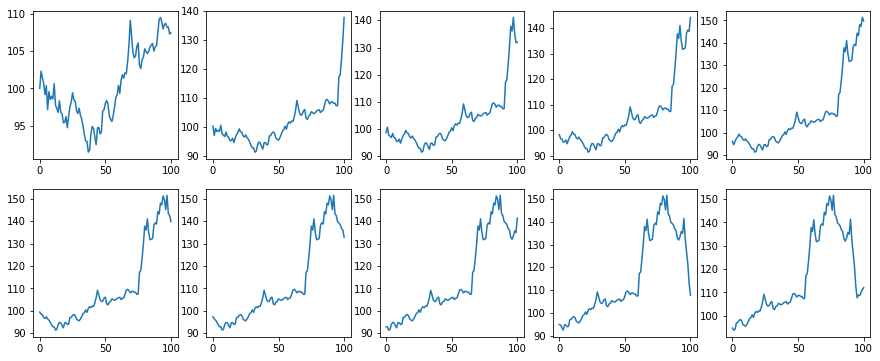

Scaler files not found


/Users/sani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  from ipykernel import kernelapp as app


0 ['0.77', '0.00', '0.23']
0 ['0.71', '0.00', '0.29']
0 ['0.66', '0.00', '0.34']
0 ['0.82', '0.00', '0.18']
0 ['0.91', '0.00', '0.09']
2 ['0.40', '0.06', '0.54']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']


In [6]:
import numpy as np, json
from finnn import FinNN
from matplotlib import pyplot as plt

test_images = np.array(json.load(open("testing_techana_frames.json")))

plt.figure(figsize=(15, 6))
for i in range(test_images.shape[0]):
    sub = plt.subplot(2, 5, i+1)
    sub.plot(test_images[i, :])
plt.show()

trainer = FinNN("CNN1D")
trainer.loadModel("techana")
test_images = np.expand_dims(test_images, axis=3)

predictions = trainer.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), ["{:.2f}".format(p) for p in predictions[i]])
    


So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.